<a href="https://colab.research.google.com/github/rawanaldaneen/pytorch_row/blob/main/image_generation_using_Stable_Diffusion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This cell installs the necessary libraries for using Stable Diffusion in Google Colab. This includes `torch` for numerical operations, `torchvision` and `torchaudio` for image and audio processing (although audio isn't directly used here), `diffusers` which provides tools for working with diffusion models like Stable Diffusion, and `transformers` which is used for loading model components.

In [ ]:
# Install necessary libraries for Stable Diffusion
!pip install torch torchvision torchaudio diffusers transformers

This cell imports the required libraries. `torch` is imported for tensor operations and interacting with the GPU. `StableDiffusionPipeline` from the `diffusers` library is the main class used to load and run the Stable Diffusion model.

In [ ]:
# Import required libraries
import torch
from diffusers import StableDiffusionPipeline

This cell loads the pre-trained Stable Diffusion model. `model_id` specifies the version of the model to use. `StableDiffusionPipeline.from_pretrained` downloads and loads the model weights. `torch_dtype=torch.float16` is used to load the model in half-precision, which reduces memory usage and speeds up inference on the GPU. `pipe = pipe.to("cuda")` moves the model to the GPU for faster processing.

In [ ]:
# Load the pre-trained Stable Diffusion model and move it to the GPU
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


This cell generates an image using the loaded Stable Diffusion model with the default settings. The `prompt` variable contains the text description for the image to be generated. `pipe(prompt)` runs the diffusion process and returns the generated images. `images[0]` selects the first generated image (by default, one image is generated). `image.save("futuristic_cityscape.png")` saves the generated image as a PNG file.

In [ ]:
# Generate an image using the default settings
prompt = "A high-resolution, detailed image of a futuristic cityscape at sunset, with flying cars and neon lights"
image = pipe(prompt).images[0]
image.save("futuristic_cityscape.png")

  0%|          | 0/50 [00:00<?, ?it/s]

This cell generates another image using the same prompt, but with a higher number of inference steps (`num_inference_steps=50`). Increasing the number of inference steps can sometimes lead to a more detailed and higher-quality image, although it also increases the generation time. The generated image is then saved with a different filename.

In [ ]:
# Generate an image with a higher number of inference steps for potentially better quality
image = pipe(prompt, num_inference_steps=50).images[0]
image.save("high_quality_futuristic_cityscape.png")

  0%|          | 0/50 [00:00<?, ?it/s]

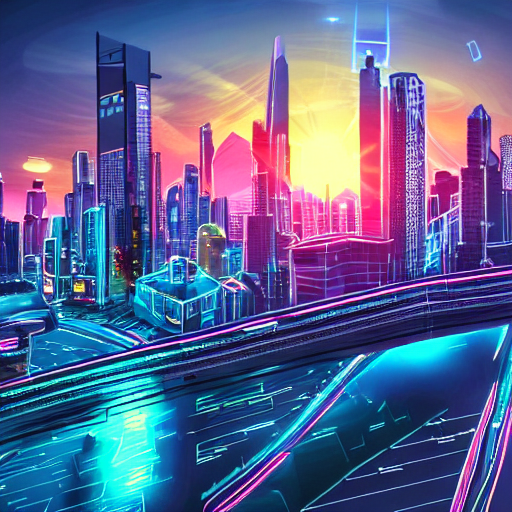

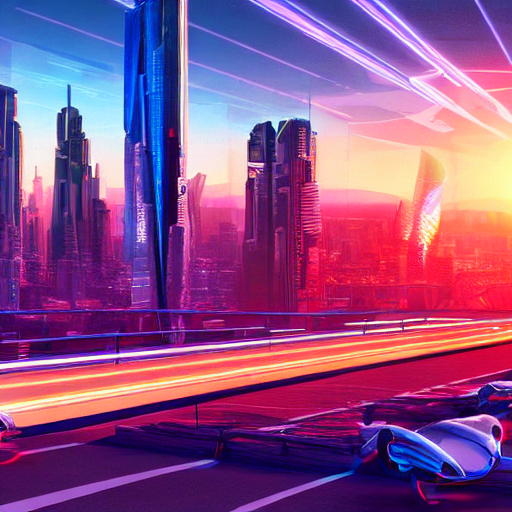

In [ ]:
from IPython.display import display, Image

display(Image("futuristic_cityscape.png"))
display(Image("high_quality_futuristic_cityscape.png"))